## Modelling Corn Plant Disease Classification with EfficientNet
# Summary & How to Use

The use of this web utlity platform is to let users of the internet upload pictures of corn plant images, have it be classified and get a determination output as to what kind of disease it shows. The platform will be UI/UX friendly for everyone of age, showing relevancy of informations about the indicated diseases. It is an integrated system of web development and AI modelling.

In [3]:
%%bash

python3 -m venv --system-site-packages ./venv
source ./venv/bin/activate
pip install --upgrade pip
pip list

  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
Package                      Version
---------------------------- --------------------
absl-py                      1.0.0
anyio                        3.4.0
AnyQt                        0.0.13
appdirs                      1.4.3
apturl                       0.5.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asn1crypto                   0.24.0
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.1.0
baycomp                      1.0.2
bcrypt                       3.1.7
beautifulsoup4               4.10.0
bleach                       4.1.0
blinker                      1.4
Bottleneck                   1.3.2
Brlapi                       0.7.0
CacheControl                 0.12.10
cachetools                   5.0.0
certifi                      2019.11.28
cffi                    

In [4]:
 
%pip install -q efficientnet
%pip install --upgrade -q Pillow
%pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 4.3 MB 407 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import tensorflow as tf
import efficientnet.tfkeras as efn
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
base_path = "./data"
train_dir = base_path + "/train"
test_dir = base_path + "/test"
diseases = os.listdir(train_dir)
print(diseases)
print("Total disease classes are: {}".format(len(diseases)))

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']
Total disease classes are: 4


### Exploring the Data

In [19]:
# Exploring the data gathered
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["No. of images"])
print(img_per_class)

n_train = 0
for val in nums.values():
    n_train += val
print(f"\nThere are {n_train} images in total for training")

                                                    No. of images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            513
Corn_(maize)___Common_rust_                                  1192
Corn_(maize)___Northern_Leaf_Blight                           985
Corn_(maize)___healthy                                       1162

There are 3852 images in total for training


Text(0.5, 1.0, 'Images per each class of plant disease')

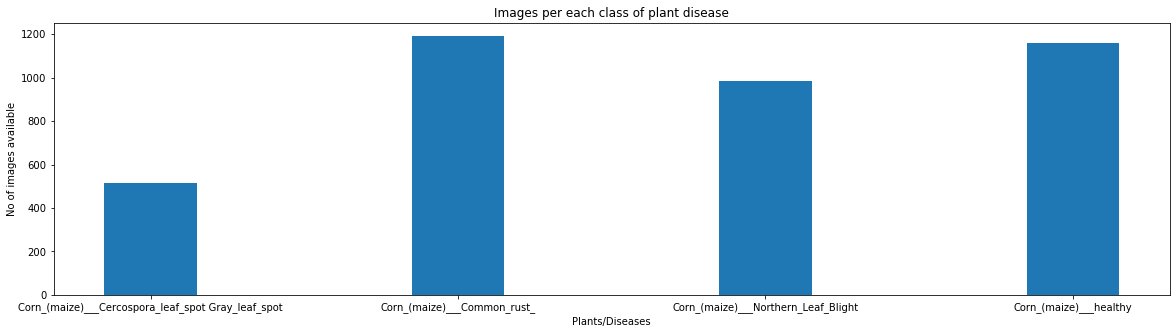

In [14]:
index = [n for n in range(4)]
plt.figure(figsize=(20,5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases')
plt.ylabel('No of images available')
plt.xticks(index, diseases)
plt.title('Images per each class of plant disease')

### Preparing the Data for Training